In [76]:
import datetime
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.dates import DateFormatter

In [2]:
infos = pd.read_csv('../data/infos.csv', sep='|')
infos

,itemID,simulationPrice,promotion
0,1,3.43,NaN
1,2,9.15,NaN
2,3,14.04,NaN
3,4,14.10,NaN
4,5,7.48,NaN
...,...,...,...
10458,10459,14.71,NaN
10459,10460,325.67,NaN
10460,10461,190.53,NaN
10461,10462,304.30,NaN


In [3]:
items = pd.read_csv('../data/items.csv', sep='|')
items

,itemID,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice
0,1,0,1,4.38,1,1,1,8.84
1,2,0,2,3.00,1,2,1,16.92
2,3,0,3,5.00,1,3,1,15.89
3,4,0,2,4.44,1,2,1,40.17
4,5,0,2,2.33,1,1,1,17.04
...,...,...,...,...,...,...,...,...
10458,10459,180,253,0.00,8,44,8,56.57
10459,10460,0,253,0.00,8,44,8,163.81
10460,10461,0,253,0.00,8,44,8,128.01
10461,10462,180,253,0.00,8,44,8,166.97


In [4]:
orders = pd.read_csv('../data/orders.csv', sep='|')
orders['time'] = pd.to_datetime(orders.time)
orders

,time,transactID,itemID,order,salesPrice
0,2018-01-01 00:01:56,2278968,450,1,17.42
1,2018-01-01 00:01:56,2278968,83,1,5.19
2,2018-01-01 00:07:11,2255797,7851,2,20.47
3,2018-01-01 00:09:24,2278968,450,1,17.42
4,2018-01-01 00:09:24,2278968,83,1,5.19
...,...,...,...,...,...
2181950,2018-06-29 23:54:22,2040347,9217,1,23.50
2181951,2018-06-29 23:55:09,2260943,2175,1,11.60
2181952,2018-06-29 23:55:09,2260943,2061,1,1.03
2181953,2018-06-29 23:55:09,2260943,2195,1,18.73


In [5]:
# change date to aggregate on daily basis
orders['time'] = orders['time'].dt.strftime('%Y-%m-%d')

# aggregate 'order' and 'salesPrice' per product 
agg_orders = orders.groupby('itemID', as_index=False).agg({'order': 'sum', 'salesPrice': 'sum'})

# order by 'order'
top_order_number = agg_orders.sort_values(by=['order'], ascending=False)
top_order_number = top_order_number.reset_index(drop=True)

# order by 'salesPrice'
top_sales_price = agg_orders.sort_values(by=['salesPrice'], ascending=False)
top_sales_price = top_sales_price.reset_index(drop=True)

In [6]:
# most ordered products
top_order_number.head()

,itemID,order,salesPrice
0,7789,12184,100413.99
1,5035,11908,369170.19
2,5117,9100,156487.53
3,4297,8675,29062.80
4,5039,8444,21543.41


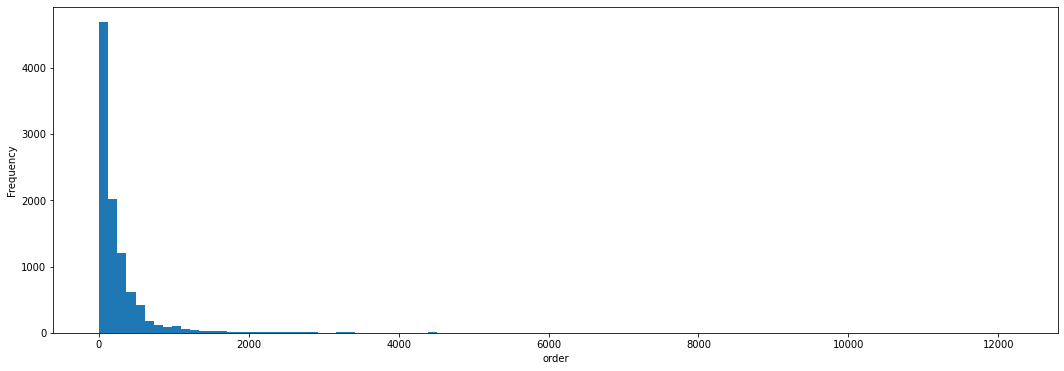

In [110]:
# 'order' distribution
plot = top_order_number['order'].plot(kind='hist', bins=100, figsize=(18, 6))
plot.set_xlabel('order')
plt.show()

In [8]:
# products with the highest revenue
top_sales_price.head()

,itemID,order,salesPrice
0,672,366,515476.81
1,320,662,504417.56
2,35,1508,502826.32
3,7625,304,433909.36
4,4965,1470,410743.93


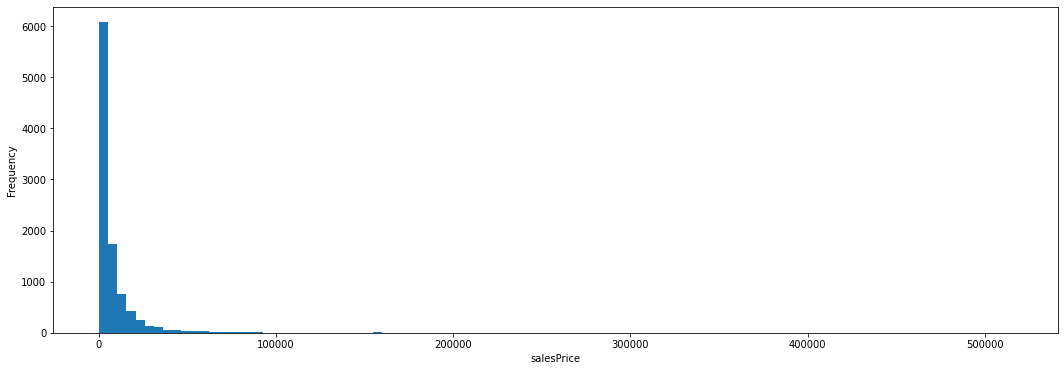

In [111]:
# 'order' distribution
plot = top_sales_price['salesPrice'].plot(kind='hist', bins=100, figsize=(18, 6))
plot.set_xlabel('salesPrice')
plt.show()

In [119]:
# aggregate 'order' and 'salesPrice' per day per product
agg_orders = orders.groupby(['itemID', 'time']).agg({'order': 'sum', 'salesPrice': 'sum'})

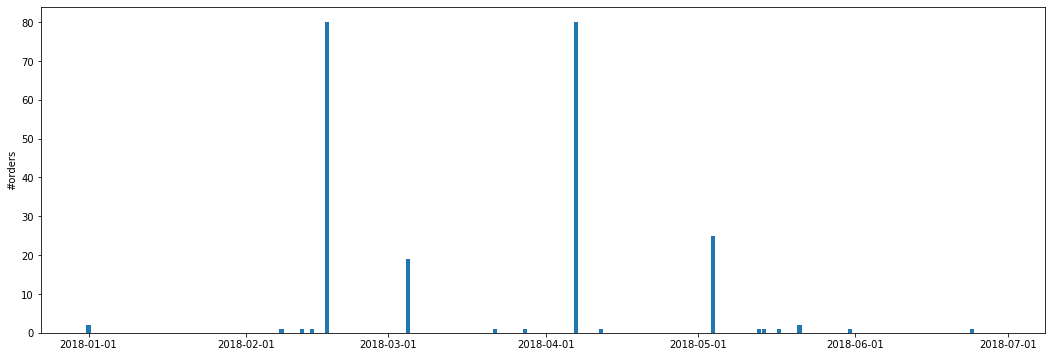

In [136]:
# number of orders over time (examplary product)
item = agg_orders.loc[7789]
idx = pd.date_range('2018-01-01', '2018-06-29')
item.index = pd.DatetimeIndex(item.index)
item = item.reindex(idx, fill_value=0)
item.index = pd.to_datetime(item.index)

# plot figure
fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(item.index.values, item['order'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_ylabel('#orders')
plt.show()

In [ ]:
# number of orders (all products)
fig, ax = plt.subplots(figsize=(18, 6))
for i in range(10462):
    try:
        item = agg_orders.loc[i + 1]
        idx = pd.date_range('2018-01-01', '2018-06-29')
        item.index = pd.DatetimeIndex(item.index)
        item = item.reindex(idx, fill_value=0)
        item.index = pd.to_datetime(item.index)
        ax.bar(item.index.values, item['order'])
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.set_ylabel('#orders')
    except KeyError:
        pass
plt.show()

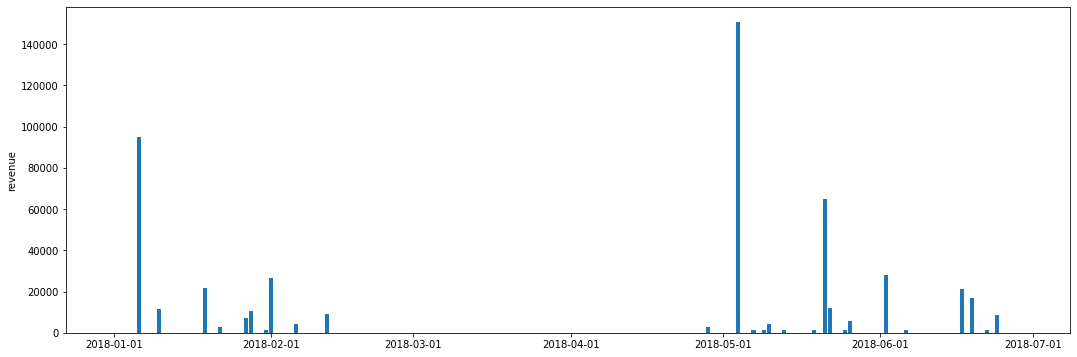

In [120]:
# revenue over time (examplary product)
item = agg_orders.loc[672]
idx = pd.date_range('2018-01-01', '2018-06-29')
item.index = pd.DatetimeIndex(item.index)
item = item.reindex(idx, fill_value=0)
item.index = pd.to_datetime(item.index)

# plot figure
fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(item.index.values, item['salesPrice'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_ylabel('revenue')
plt.show()

In [ ]:
# revenue over time (all products)
fig, ax = plt.subplots(figsize=(18, 6))
for i in range(10462):
    try:
        item = agg_orders.loc[i + 1]
        idx = pd.date_range('2018-01-01', '2018-06-29')
        item.index = pd.DatetimeIndex(item.index)
        item = item.reindex(idx, fill_value=0)
        item.index = pd.to_datetime(item.index)
        ax.bar(item.index.values, item['salesPrice'])
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.set_ylabel('revenue')
    except KeyError:
        pass
plt.show()

In [ ]:
# TODO: sold products per day

In [ ]:
# TODO: revenue per day